## Table des matières
* [Nettoyage des jeux de données](#partie1)
    * [Erreur de formatage](#sous_partie1-1)
    * [Valeurs manquantes](#sous_partie1-2)
    * [Détection des outliers](#sous_partie1-3)
    * [Détection des doublons](#sous_partie1-4)
    * [Autres types d'erreurs](#sous_partie1-5)
* [Chiffre d'affaires par produit](#partie2)
* [Chiffre d'affaires total](#partie3)
* [Analyse univariée](#partie4)
    * [Analyse du prix](#sous_partie4-1)
        * [Représentation sous forme de tableau](#sub_partie4-1-1)
        * [Mesures de tendance centrale](#sub_partie4-1-2)
        * [Mesures de forme](#sub_partie4-1-3)
        * [Mesures de dispersion](#sub_partie4-1-4)
    * [Analyse des outliers](#sub_partie4-1-5)
    * [Analyse du chiffre d'affaires](#sous_partie4-2)
        * [Mesures de tendance centrale & de dispersion](#sub_partie4-2-1)
        * [Mesures de concentration](#sub_partie4-2-2)
* [Analyse bivariée](#partie5)
    * [Diagramme de dispersion](#sous_partie5-1)
    * [Coefficient de Pearson](#sous_partie5-2)

# Importation des librairies

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
import numpy as np
import scipy.stats as st

In [3]:
import matplotlib.pyplot as plot
import seaborn as sb

# Importation des données

#### Dataset 1 : Données de l'ERP

In [4]:
erp = pd.read_csv("erp.csv", sep=";")
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


Comme vous pouvez le voir ci-dessus, nous avons 835 produits renseignés sur 5 variables différentes. 

In [5]:
erp.shape

(825, 5)

#### Dataset 2 : Données du site web

In [6]:
web = pd.read_csv("web.csv", sep=";")
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Nous avons 1513 produits renseignés sur 28 variables différentes. 

In [7]:
web.shape

(1513, 28)

#### Dataset 3 : Données de liaison

In [8]:
liaison = pd.read_csv("liaison.csv", sep=";")
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


Nous avons 825 ids renseignés sur 2 variables différentes.

In [9]:
liaison.shape

(825, 2)

# Vérification et nettoyage des données<a class="anchor" id="partie1"></a>

## Erreur de formatage<a class="anchor" id="sous_partie1-1"></a>

#### Dataset 1

Les variables "product_id" et "onsale_web" sont transformés en object.

In [10]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [11]:
erp["product_id"] = erp["product_id"].astype(str)
erp["onsale_web"] = erp["onsale_web"].astype(str)
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    object 
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 32.4+ KB


#### Dataset 2

Plusieurs erreurs se sont glissées dans ce jeu de données.

In [12]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

Premièrement, modifions les valeurs dichotomiques en object.

In [13]:
web["virtual"] = web["virtual"].astype(str)
web["post_author"] = web["post_author"].astype(str)
web["post_parent"] = web["post_parent"].astype(str)
web["menu_order"] = web["menu_order"].astype(str)
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   object 
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1513 non-null   object 
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

Puis, spécifions les variables qui sont des dates via la fonction to_datetime.

In [14]:
web["post_date"] = pd.to_datetime(web["post_date"])
web["post_date_gmt"] = pd.to_datetime(web["post_date_gmt"])
web["post_modified"] = pd.to_datetime(web["post_modified"])
web["post_modified_gmt"] = pd.to_datetime(web["post_modified_gmt"])
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   object        
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1513 non-null   object        
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

#### Dataset 3

La seule chose qui semble être problématique est la variable "product_id" qui doit être un object.

In [15]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [16]:
liaison["product_id"] = liaison["product_id"].astype(str)
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    object
 1   id_web      734 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


## Nettoyage des valeurs manquantes<a class="anchor" id="sous_partie1-2"></a>

On va ensuite vérifier si notre jeu de données contient des valeurs manquantes.

#### Dataset 1 : RAS

In [17]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

#### Dataset 2 : 9941 valeurs manquantes

On observe que notre jeu de données contient de nombreuses valeurs manquantes. 

In [18]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                 0
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                 0
guid                       83
menu_order                  0
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

Affichons uniquement les variables qui ont des valeurs manquantes.

In [19]:
nb_na = web.isnull().sum()
nb_na[nb_na>0]

sku                        85
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
guid                       83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

Regardons les plus en détails :

In [20]:
web.loc[web["sku"].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,nan,NaT,...,NaN,NaT,NaT,NaN,nan,NaN,nan,NaN,NaN,NaN


Pour commencer, supprimons les 4 colonnes complètement vides et superflu pour l'analyse. Ce sont celles qui ont 1513 valeurs manquantes.

In [21]:
web = web.drop(["tax_class", "post_content", "post_content_filtered", "post_password"], axis=1)
web.isnull().sum()

sku                   85
virtual                0
downloadable           0
rating_count           0
average_rating        83
total_sales           83
tax_status           797
post_author            0
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
post_parent            0
guid                  83
menu_order             0
post_type             83
post_mime_type       799
comment_count         83
dtype: int64

Puis concentrons-nous sur les variables qui ont 797 valeurs manquantes. Pour les "tax_status", on fait le choix de mettre tous les produits en "taxable".

In [22]:
web["tax_status"] = web["tax_status"].fillna(method= "ffill")
web.isnull().sum()

sku                   85
virtual                0
downloadable           0
rating_count           0
average_rating        83
total_sales           83
tax_status             0
post_author            0
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
post_parent            0
guid                  83
menu_order             0
post_type             83
post_mime_type       799
comment_count         83
dtype: int64

Pour "post_mine_type" et "post-excerpt", nous allons remplacer les informations manquantes par une non-disponibilité.

In [23]:
web["post_mime_type"] = web["post_mime_type"].fillna("non-disponible")
web["post_excerpt"] = web["post_excerpt"].fillna("Non disponible")
web.isnull().sum()

sku                  85
virtual               0
downloadable          0
rating_count          0
average_rating       83
total_sales          83
tax_status            0
post_author           0
post_date            83
post_date_gmt        83
post_title           83
post_excerpt          0
post_status          83
comment_status       83
ping_status          83
post_name            83
post_modified        83
post_modified_gmt    83
post_parent           0
guid                 83
menu_order            0
post_type            83
post_mime_type        0
comment_count        83
dtype: int64

Pour les variables "average_rating" et "comment_count", toutes les cellules sont à 0. Nous choisissons donc de remplir les valeurs nulles avec un fillna; ce qui nous permettra d'effectuer la conversion évoquée précédemment.

In [24]:
web["average_rating"] = web["average_rating"].fillna(0)
web["comment_count"] = web["comment_count"].fillna(0)
web.isnull().sum()

sku                  85
virtual               0
downloadable          0
rating_count          0
average_rating        0
total_sales          83
tax_status            0
post_author           0
post_date            83
post_date_gmt        83
post_title           83
post_excerpt          0
post_status          83
comment_status       83
ping_status          83
post_name            83
post_modified        83
post_modified_gmt    83
post_parent           0
guid                 83
menu_order            0
post_type            83
post_mime_type        0
comment_count         0
dtype: int64

Ici, on peut déduire que deux SKU sont manquants, car ce sont les seules lignes contenant des informations produits. Ils seront remplacés pour ne pas perdre les informations qui leur sont associées.

In [25]:
web.iloc[[470], [0]] = 0
web.iloc[[471], [0]] = 1
display(web.iloc[470:472])

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,0,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,non-disponible,0.0
471,1,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,non-disponible,0.0


In [26]:
web.isnull().sum()

sku                  83
virtual               0
downloadable          0
rating_count          0
average_rating        0
total_sales          83
tax_status            0
post_author           0
post_date            83
post_date_gmt        83
post_title           83
post_excerpt          0
post_status          83
comment_status       83
ping_status          83
post_name            83
post_modified        83
post_modified_gmt    83
post_parent           0
guid                 83
menu_order            0
post_type            83
post_mime_type        0
comment_count         0
dtype: int64

Le reste des données sont totalement vides, nulles ou superflu pour l'analyse. Ces lignes peuvent être supprimées.

In [27]:
web.loc[web["sku"].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0
179,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0
227,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0
230,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0
231,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0
793,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0
794,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0
795,NaN,0,0,0,0.0,NaN,taxable,nan,NaT,NaT,...,NaN,NaN,NaT,NaT,nan,NaN,nan,NaN,non-disponible,0.0


In [28]:
web = web.dropna(subset=["sku"])
web.isnull().sum()

sku                  0
virtual              0
downloadable         0
rating_count         0
average_rating       0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
post_parent          0
guid                 0
menu_order           0
post_type            0
post_mime_type       0
comment_count        0
dtype: int64

Après nettoyage, le dataset 2 contient 1430 lignes et 24 colonnes.

In [29]:
web.shape

(1430, 24)

#### Dataset 3 : 91 données manquantes

Ici, les données ne seront ni supprimées, ni remplacées car nous avons besoin de toutes les données pour les jointures.

In [30]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

## Détection des outliers<a class="anchor" id="sous_partie1-3"></a>

#### Dataset 1 : RAS 

In [31]:
erp.describe()

,price,stock_quantity
count,825.000000,825.000000
mean,32.415636,26.496970
std,26.795849,45.892422
min,5.200000,0.000000
25%,14.600000,1.000000
50%,24.400000,11.000000
75%,42.000000,34.000000
max,225.000000,578.000000


#### Dataset 2 : RAS 

In [32]:
web.describe()

,downloadable,rating_count,average_rating,total_sales,comment_count
count,1430.0,1430.0,1430.0,1430.000000,1430.0
mean,0.0,0.0,0.0,4.006993,0.0
std,0.0,0.0,0.0,8.510559,0.0
min,0.0,0.0,0.0,0.000000,0.0
25%,0.0,0.0,0.0,0.000000,0.0
50%,0.0,0.0,0.0,1.000000,0.0
75%,0.0,0.0,0.0,4.000000,0.0
max,0.0,0.0,0.0,96.000000,0.0


#### Dataset 3 : RAS 

In [33]:
liaison.describe()

,product_id,id_web
count,825,734
unique,825,734
top,3847,15298
freq,1,1


## Détection des doublons<a class="anchor" id="sous_partie1-4"></a>

#### Dataset 1 : RAS 

In [34]:
erp_duplicated = erp[erp.duplicated(keep="last")]

In [35]:
print(erp_duplicated)

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []


#### Dataset 2 : RAS

Après vérification, les 714 lignes trouvées avec "sku + post_title" ne sont pas vraiment des valeurs dupliquées. Ce sont des "attachement" et non des produits, mais il n'existe pas deux fois le même produit sur la boutique.

In [36]:
web[web.duplicated(["sku", "post_title"])]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


On peut le constater en filtrant avec les variables "sku" et "guid". Nous ferons le choix de ne pas les enlever, mais plutôt de filtrer le dataset.

In [37]:
web[web.duplicated(["sku", "guid"])]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


#### Dataset 3 : RAS  

In [38]:
liaison_duplicated = liaison[liaison.duplicated(keep="last")]

In [39]:
print(liaison_duplicated)

Empty DataFrame
Columns: [product_id, id_web]
Index: []


## Autres types d'erreurs<a class="anchor" id="sous_partie1-5"></a>

Suite à une erreur de Sylvie, la variable "id_web" doit être renommé "sku".

In [40]:
liaison.rename(columns={"id_web": "sku"}, inplace=True)
display(liaison.head())

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


## Reset des index et organisation des données

#### Dataset 1

In [41]:
erp.reset_index(drop=True)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


#### Dataset 2

Comme évoqué précédemment, nous allons filtrer les données pour ne pas prendre en compte que les "product" et pas les "attachment".

In [42]:
web_product = web[(web["post_type"] == "product")]

Pour une meilleure lisibilité, nous allons également filtrer les informations qui ne sont pas utiles pour l'analyse.

In [43]:
web_product = web_product[["sku", "total_sales", "post_title", "post_excerpt", "post_status", "post_date", "post_modified", "guid"]]

In [44]:
web_product.reset_index(drop=True)

,sku,total_sales,post_title,post_excerpt,post_status,post_date,post_modified,guid
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,2018-06-01 13:53:46,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,2018-02-08 12:58:52,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,2018-02-08 13:49:41,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,2018-02-08 14:08:36,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,2018-02-09 14:01:05,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...
...,...,...,...,...,...,...,...,...
711,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,2020-04-25 13:22:38,2020-08-26 17:35:03,https://www.bottle-neck.fr/?post_type=product&...
712,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,2020-05-02 14:53:40,2020-08-26 17:35:02,https://www.bottle-neck.fr/?post_type=product&...
713,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,2020-05-02 15:00:54,2020-08-14 18:15:03,https://www.bottle-neck.fr/?post_type=product&...
714,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,2020-06-09 15:42:04,2020-07-20 17:09:06,https://www.bottle-neck.fr/?post_type=product&...


#### Dataset 3

In [45]:
liaison.reset_index(drop=True)

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


## Jointure des tables

Ici, nous faisons le choix de joindre les datasets à droite.

#### Dataset 1 avec dataset 3

In [46]:
df_erp = pd.merge(liaison, erp, how="right", on="product_id", indicator=True)
df_erp.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both


Rien n'a signalé. La colonne "_merge" peut être supprimé.

In [47]:
df_erp = df_erp.drop("_merge", axis=1)

In [48]:
df_erp.shape

(825, 6)

#### Dataset 2 avec dataset 3

In [49]:
df_web = pd.merge(liaison, web_product, how="right", on="sku", indicator=True)
df_web.head()

,product_id,sku,total_sales,post_title,post_excerpt,post_status,post_date,post_modified,guid,_merge
0,4954,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,2018-06-01 13:53:46,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,both
1,3847,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,2018-02-08 12:58:52,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,both
2,3849,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,2018-02-08 13:49:41,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,both
3,3850,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,2018-02-08 14:08:36,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,both
4,4032,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,2018-02-09 14:01:05,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,both


On obtient comme résultat toutes les lignes du dataset "web" avec les lignes correspondantes du dataset "liaison". Ainsi les lignes correspondantes au SKU "0" et "1" deviennent des valeurs manquantes. On peut remarquer que ce sont les SKU que nous avons isolés pendant le nettoyage.

In [50]:
print(df_web[df_web["_merge"] != "both"])

    product_id sku  total_sales  \
448        NaN   0          0.0   
449        NaN   1          0.0   

                                          post_title  \
448       Pierre Jean Villa Côte Rôtie Fongeant 2017   
449  Pierre Jean Villa Condrieu Jardin Suspendu 2018   

                                          post_excerpt post_status  \
448  Fongeant 2017 explose sur un fruit brillant, p...     publish   
449  <span id="u1194-83">Le nez séduit par ses parf...     publish   

              post_date       post_modified  \
448 2018-07-31 12:07:23 2019-11-02 13:24:15   
449 2018-08-08 11:23:43 2019-11-02 13:24:01   

                                                  guid      _merge  
448  https://www.bottle-neck.fr/?post_type=product&...  right_only  
449  https://www.bottle-neck.fr/?post_type=product&...  right_only  


La colonne "_merge" peut être supprimé.

In [51]:
df_web = df_web.drop("_merge", axis=1)

In [52]:
df_web.shape

(716, 9)

#### Dataset df_erp & df_web

Ici, nous faisons le choix de joindre les datasets à gauche, ce qui permet de retrouver tous les enregistrements de la table df_erp qui contient plus d'informations que la table df_web. 

In [53]:
df_bottleneck = pd.merge(df_erp, df_web, how="left", on="product_id", indicator=True)

In [54]:
df_bottleneck.head()

,product_id,sku_x,onsale_web,price,stock_quantity,stock_status,sku_y,total_sales,post_title,post_excerpt,post_status,post_date,post_modified,guid,_merge
0,3847,15298,1,24.2,0,outofstock,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,2018-02-08 12:58:52,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,both
1,3849,15296,1,34.3,0,outofstock,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,2018-02-08 13:49:41,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,both
2,3850,15300,1,20.8,0,outofstock,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,2018-02-08 14:08:36,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,both
3,4032,19814,1,14.1,0,outofstock,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,2018-02-09 14:01:05,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,both
4,4039,19815,1,46.0,0,outofstock,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,2018-02-12 09:04:37,2020-01-04 16:36:10,https://www.bottle-neck.fr/?post_type=product&...,both


On obtient comme résultat toutes les lignes de la table "web" avec les lignes correspondantes de la table "erp". Ainsi 111 lignes n'ont pas d'équivalent et deviennent des valeurs manquantes. Ce sont probablement des produits qui sont vendus via l'ERP mais pas disponible en ligne.

In [55]:
print(df_bottleneck[df_bottleneck["_merge"] != "both"])

    product_id    sku_x onsale_web  price  stock_quantity stock_status sku_y  \
19        4055      NaN          0   86.1               0   outofstock   NaN   
49        4090      NaN          0   73.0               0   outofstock   NaN   
50        4092      NaN          0   47.0               0   outofstock   NaN   
119       4195      NaN          0   14.1               0   outofstock   NaN   
131       4209      NaN          0   73.5               0   outofstock   NaN   
..         ...      ...        ...    ...             ...          ...   ...   
818       7200      NaN          0   31.0               6      instock   NaN   
819       7201      NaN          0   31.0              18      instock   NaN   
820       7203      NaN          0   45.0              30      instock   NaN   
821       7204      NaN          0   45.0               9      instock   NaN   
823       7329  14680-1          0   26.5              14      instock   NaN   

     total_sales post_title post_excerp

In [56]:
df_bottleneck.shape

(825, 15)

### Nettoyage de la jointure finale

Une fois les jointures finies, nous pouvons supprimer la colonne dupliquée "sku_y".

In [57]:
df_bottleneck = df_bottleneck.drop("sku_y", axis=1)

Pour plus de lisibilité, nous pouvons renommer la colonne sku_x en sku et réorganiser l'ordre des colonnes.

In [58]:
df_bottleneck.rename(columns={"sku_x": "sku"}, inplace=True)
df_bottleneck = df_bottleneck[["product_id", "sku", "post_title", "post_excerpt", "price", "total_sales", "stock_status", "post_status", "post_date", "post_modified"]]
df_bottleneck.reset_index(drop=True)

,product_id,sku,post_title,post_excerpt,price,total_sales,stock_status,post_status,post_date,post_modified
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",24.2,6.0,outofstock,publish,2018-02-08 12:58:52,2019-12-30 09:30:29
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,34.3,0.0,outofstock,publish,2018-02-08 13:49:41,2019-12-21 09:00:17
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",20.8,0.0,outofstock,publish,2018-02-08 14:08:36,2020-06-26 18:15:03
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,14.1,3.0,outofstock,publish,2018-02-09 14:01:05,2020-01-04 16:36:01
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,46.0,0.0,outofstock,publish,2018-02-12 09:04:37,2020-01-04 16:36:10
...,...,...,...,...,...,...,...,...,...,...
820,7203,NaN,NaN,NaN,45.0,NaN,instock,NaN,NaT,NaT
821,7204,NaN,NaN,NaN,45.0,NaN,instock,NaN,NaT,NaT
822,7247,13127-1,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",54.8,0.0,instock,publish,2020-06-09 15:42:04,2020-07-20 17:09:06
823,7329,14680-1,NaN,NaN,26.5,NaN,instock,NaN,NaT,NaT


Au vu de nos jointures, certains "product_id" n'ont pas d'équivalent sur la boutique.

In [59]:
display(df_bottleneck.loc[df_bottleneck["sku"].isnull() & df_bottleneck["total_sales"].isnull()])

,product_id,sku,post_title,post_excerpt,price,total_sales,stock_status,post_status,post_date,post_modified
19,4055,NaN,NaN,NaN,86.1,NaN,outofstock,NaN,NaT,NaT
49,4090,NaN,NaN,NaN,73.0,NaN,outofstock,NaN,NaT,NaT
50,4092,NaN,NaN,NaN,47.0,NaN,outofstock,NaN,NaT,NaT
119,4195,NaN,NaN,NaN,14.1,NaN,outofstock,NaN,NaT,NaT
131,4209,NaN,NaN,NaN,73.5,NaN,outofstock,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
817,7196,NaN,NaN,NaN,31.0,NaN,instock,NaN,NaT,NaT
818,7200,NaN,NaN,NaN,31.0,NaN,instock,NaN,NaT,NaT
819,7201,NaN,NaN,NaN,31.0,NaN,instock,NaN,NaT,NaT
820,7203,NaN,NaN,NaN,45.0,NaN,instock,NaN,NaT,NaT


Sachant que leur nombre de ventes est zéro, nous pouvons les retirer de notre dataset.

In [60]:
df_bottleneck = df_bottleneck.dropna(subset=["sku"])
df_bottleneck.reset_index(drop=True)

,product_id,sku,post_title,post_excerpt,price,total_sales,stock_status,post_status,post_date,post_modified
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",24.2,6.0,outofstock,publish,2018-02-08 12:58:52,2019-12-30 09:30:29
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,34.3,0.0,outofstock,publish,2018-02-08 13:49:41,2019-12-21 09:00:17
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",20.8,0.0,outofstock,publish,2018-02-08 14:08:36,2020-06-26 18:15:03
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,14.1,3.0,outofstock,publish,2018-02-09 14:01:05,2020-01-04 16:36:01
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,46.0,0.0,outofstock,publish,2018-02-12 09:04:37,2020-01-04 16:36:10
...,...,...,...,...,...,...,...,...,...,...
729,7023,15891,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,27.5,0.0,instock,publish,2020-05-02 14:53:40,2020-08-26 17:35:02
730,7025,15887,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",69.0,0.0,instock,publish,2020-05-02 15:00:54,2020-08-14 18:15:03
731,7247,13127-1,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",54.8,0.0,instock,publish,2020-06-09 15:42:04,2020-07-20 17:09:06
732,7329,14680-1,NaN,NaN,26.5,NaN,instock,NaN,NaT,NaT


Après la suppression de ces lignes, le dataset contient 734 lignes et 10 colonnes.

In [61]:
df_bottleneck.shape

(734, 10)

Nous pouvons constater qu'il reste encore des informations manquantes. Il semblerait que 20 produits possèdent des SKU et un product_id mais n'ont pas d'informations produits. Ce sont peut-être un historique d'une migration.

In [62]:
df_bottleneck.isnull().sum()

product_id        0
sku               0
post_title       20
post_excerpt     20
price             0
total_sales      20
stock_status      0
post_status      20
post_date        20
post_modified    20
dtype: int64

In [63]:
display(df_bottleneck.loc[df_bottleneck["post_title"].isnull() & df_bottleneck["total_sales"].isnull()])

,product_id,sku,post_title,post_excerpt,price,total_sales,stock_status,post_status,post_date,post_modified
193,4289,13771,NaN,NaN,22.8,NaN,outofstock,NaN,NaT,NaT
236,4568,15065,NaN,NaN,21.5,NaN,outofstock,NaN,NaT,NaT
241,4584,14785,NaN,NaN,32.3,NaN,outofstock,NaN,NaT,NaT
355,4741,12601,NaN,NaN,12.4,NaN,outofstock,NaN,NaT,NaT
391,4864,15154,NaN,NaN,8.3,NaN,outofstock,NaN,NaT,NaT
394,4869,14360,NaN,NaN,17.2,NaN,outofstock,NaN,NaT,NaT
424,4921,15608,NaN,NaN,13.8,NaN,outofstock,NaN,NaT,NaT
425,4922,15586,NaN,NaN,21.5,NaN,outofstock,NaN,NaT,NaT
470,5018,15272,NaN,NaN,15.4,NaN,outofstock,NaN,NaT,NaT
473,5021,15630,NaN,NaN,17.1,NaN,outofstock,NaN,NaT,NaT


Sachant que leur nombre de ventes est également à zéro, nous pouvons les retirer de notre dataset.

In [64]:
df_bottleneck = df_bottleneck.dropna(subset=["post_title"])
df_bottleneck.reset_index(drop=True)

,product_id,sku,post_title,post_excerpt,price,total_sales,stock_status,post_status,post_date,post_modified
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",24.2,6.0,outofstock,publish,2018-02-08 12:58:52,2019-12-30 09:30:29
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,34.3,0.0,outofstock,publish,2018-02-08 13:49:41,2019-12-21 09:00:17
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",20.8,0.0,outofstock,publish,2018-02-08 14:08:36,2020-06-26 18:15:03
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,14.1,3.0,outofstock,publish,2018-02-09 14:01:05,2020-01-04 16:36:01
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,46.0,0.0,outofstock,publish,2018-02-12 09:04:37,2020-01-04 16:36:10
...,...,...,...,...,...,...,...,...,...,...
709,6930,16135,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,8.4,5.0,instock,publish,2020-04-25 13:22:38,2020-08-26 17:35:03
710,7023,15891,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,27.5,0.0,instock,publish,2020-05-02 14:53:40,2020-08-26 17:35:02
711,7025,15887,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",69.0,0.0,instock,publish,2020-05-02 15:00:54,2020-08-14 18:15:03
712,7247,13127-1,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",54.8,0.0,instock,publish,2020-06-09 15:42:04,2020-07-20 17:09:06


Après la suppression de ces lignes, le dataset final contient 714 lignes et 10 colonnes.

In [65]:
df_bottleneck.shape

(714, 10)

Pour finir, nous vérifions que la jointure n'a pas affecté le formatage des données. Vu qu'il n'y a plus de valeurs manquantes, nous faisons donc en sorte de convertir la variable "total_sales" en integer. Rien n'a signalé pour le reste.

In [66]:
df_bottleneck.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     714 non-null    object        
 1   sku            714 non-null    object        
 2   post_title     714 non-null    object        
 3   post_excerpt   714 non-null    object        
 4   price          714 non-null    float64       
 5   total_sales    714 non-null    float64       
 6   stock_status   714 non-null    object        
 7   post_status    714 non-null    object        
 8   post_date      714 non-null    datetime64[ns]
 9   post_modified  714 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 61.4+ KB


In [67]:
df_bottleneck["total_sales"] = df_bottleneck["total_sales"].astype(int)
df_bottleneck.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     714 non-null    object        
 1   sku            714 non-null    object        
 2   post_title     714 non-null    object        
 3   post_excerpt   714 non-null    object        
 4   price          714 non-null    float64       
 5   total_sales    714 non-null    int32         
 6   stock_status   714 non-null    object        
 7   post_status    714 non-null    object        
 8   post_date      714 non-null    datetime64[ns]
 9   post_modified  714 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(1), object(6)
memory usage: 58.6+ KB


Pas d'autres erreurs détectées.

In [68]:
df_bottleneck.describe()

,price,total_sales
count,714.000000,714.000000
mean,32.493137,4.012605
std,27.810525,8.518183
min,5.200000,0.000000
25%,14.100000,0.000000
50%,23.550000,1.000000
75%,42.175000,4.000000
max,225.000000,96.000000


# Chiffre d’affaires par produit<a class="anchor" id="partie2"></a>

In [69]:
ca_prod_bottleneck = df_bottleneck[(df_bottleneck["price"] >0) & (df_bottleneck["total_sales"] > 0)]

#### Somme des quantités vendus

In [70]:
quantity_bottleneck = ca_prod_bottleneck["total_sales"].sum()

In [71]:
print("Le nombre de ventes s'élève à", quantity_bottleneck, "bouteilles.")

Le nombre de ventes s'élève à 2865 bouteilles.


Nous allons aggrégons les colonnes pour avoir la somme des prix et la somme des quantités de chaque bouteille.

In [72]:
ca_prod_bottleneck = ca_prod_bottleneck.groupby(["product_id", "sku", "post_title", "stock_status"]).agg({"price": "sum", "total_sales": "sum"}).reset_index()

Nous allons rajouter la colonne du chiffre d'affaires dans le dataset.

In [73]:
ca_prod_bottleneck["sales_revenue"] = ca_prod_bottleneck["price"]*ca_prod_bottleneck["total_sales"]
ca_prod_bottleneck

,product_id,sku,post_title,stock_status,price,total_sales,sales_revenue
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,outofstock,24.2,6,145.2
1,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,outofstock,14.1,3,42.3
2,4042,16042,Pierre Gaillard Cornas 2017,instock,31.2,7,218.4
3,4043,14980,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,instock,60.0,3,180.0
4,4045,16041,Pierre Gaillard Côte Rôtie 2018,instock,42.6,14,596.4
...,...,...,...,...,...,...,...
380,6665,16068,Domaine Hauvette IGP Alpilles Jaspe 2017,instock,27.7,1,27.7
381,6738,8193,Emile Boeckel Crémant Chardonnay Extra Brut 2016,instock,15.4,3,46.2
382,6926,15845,Château Jean Faure Saint-Emilion Grand Cru 2016,instock,49.9,1,49.9
383,6928,15741,Le Cèdre de Jean Faure Saint-Emilion 2016,instock,19.0,2,38.0


Les 10 bouteilles qui rapportent le plus de chiffre d'affaires sont les suivantes :

In [74]:
ca_prod_bottleneck.sort_values("sales_revenue", ascending=False).reset_index(drop=True)[0:10]

,product_id,sku,post_title,stock_status,price,total_sales,sales_revenue
0,4334,7818,Champagne Gosset Grand Blanc de Blancs,outofstock,49.0,96,4704.0
1,4144,1662,Champagne Gosset Grand Rosé,instock,49.0,87,4263.0
2,4402,3510,Cognac Frapin VIP XO,instock,176.0,13,2288.0
3,4142,11641,Champagne Gosset Grand Millésime 2006,instock,53.0,30,1590.0
4,4141,304,Champagne Gosset Grande Réserve,instock,39.0,40,1560.0
5,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,instock,126.5,11,1391.5
6,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,outofstock,225.0,5,1125.0
7,4153,16237,Elian Daros Côtes du Marmandais Clos Baquey 2015,outofstock,29.0,36,1044.0
8,6206,16580,Domaine Giudicelli Patrimonio Blanc 2019,instock,25.2,41,1033.2
9,4068,16416,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,instock,16.6,62,1029.2


Les 10 bouteilles les plus vendues sont les suivantes :

In [75]:
ca_prod_bottleneck.sort_values("total_sales", ascending=False).reset_index(drop=True)[0:10]

,product_id,sku,post_title,stock_status,price,total_sales,sales_revenue
0,4334,7818,Champagne Gosset Grand Blanc de Blancs,outofstock,49.0,96,4704.0
1,4144,1662,Champagne Gosset Grand Rosé,instock,49.0,87,4263.0
2,4068,16416,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,instock,16.6,62,1029.2
3,4200,16295,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,instock,5.8,46,266.8
4,4172,16210,Maurel Pays d'Oc Chardonnay 2019,instock,5.7,43,245.1
5,4187,16189,Le Pas de l'Escalette Languedoc Les Petits Pas...,instock,13.3,42,558.6
6,6206,16580,Domaine Giudicelli Patrimonio Blanc 2019,instock,25.2,41,1033.2
7,4141,304,Champagne Gosset Grande Réserve,instock,39.0,40,1560.0
8,4729,38,Emile Boeckel Crémant Brut Blanc de Blancs,instock,8.6,38,326.8
9,6047,16264,Château de La Liquière Faugères L'Ampoule 2019,instock,10.9,38,414.2


# Chiffre d’affaires total<a class="anchor" id="partie3"></a>

In [76]:
ca_bottleneck = ca_prod_bottleneck["sales_revenue"].sum()

In [77]:
print("Le total du chiffre d'affaires réalisé en ligne s'élève à", round(ca_bottleneck), "€")

Le total du chiffre d'affaires réalisé en ligne s'élève à 70569 €


# Analyse univariée<a class="anchor" id="partie4"></a>

## Analyse du prix<a class="anchor" id="sous_partie4-1"></a>

Il y a-t-il des erreurs de saisie dans certains prix des produits ?

### Représentation sous forme de tableau<a class="anchor" id="sub_partie4-1-1"></a>

On va d'abord représenter la variable "price" sous forme de tableau.

In [78]:
effectifs = ca_prod_bottleneck["price"].value_counts()
modalites = effectifs.index

tab = pd.DataFrame(modalites, columns = ["price"]) 
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(ca_prod_bottleneck) 

display(tab)

,price,n,f
0,9.9,6,0.015584
1,9.3,6,0.015584
2,19.0,6,0.015584
3,16.3,4,0.010390
4,38.6,4,0.010390
...,...,...,...
236,50.0,1,0.002597
237,21.5,1,0.002597
238,28.5,1,0.002597
239,24.3,1,0.002597


Pour calculer les fréquences cumulées, il suffit de trier les valeurs et de calculer la somme cumulée des fréquences. Ici, on peut constater que les prix élevés semblent être moins réccurents que les prix entre 5 et 10 €. 

In [79]:
tab = tab.sort_values("price") 
tab["F"] = tab["f"].cumsum()

display(tab)

,price,n,f,F
23,5.7,3,0.007792,0.007792
13,5.8,3,0.007792,0.015584
212,6.3,1,0.002597,0.018182
34,6.5,3,0.007792,0.025974
164,6.7,1,0.002597,0.028571
...,...,...,...,...
142,135.0,1,0.002597,0.989610
202,137.0,1,0.002597,0.992208
226,176.0,1,0.002597,0.994805
138,191.3,1,0.002597,0.997403


### Mesures de tendance centrale<a class="anchor" id="sub_partie4-1-2"></a>

Les prix semblent hétérogènes : il y a des valeurs parfois importantes, souvent petites, et des entre deux. Difficile donc d'interpréter la moyenne (très sensible aux valeurs atypiques) qui vaut ici 26,59 €. 

A savoir qu'en France, une bouteille de vin coûte en moyenne 6,33 euros et une bouteille de champagne coûte 30 euros.

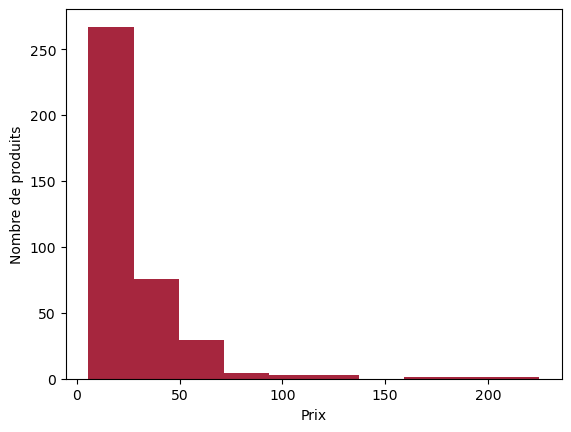

Moyenne : 26.58 €
Médiane : 19 €


In [80]:
color = ["#A6263E"]
x = ca_prod_bottleneck["price"]
plot.hist(x, color=color)

plot.xlabel("Prix")
plot.ylabel("Nombre de produits")

plot.show()

print("Moyenne :", round(ca_prod_bottleneck["price"].mean(), 2),"€")
print("Médiane :", round(ca_prod_bottleneck["price"].median()), "€")

### Mesures de forme<a class="anchor" id="sub_partie4-1-3"></a>

Les mesures de forme vont déterminer si la majeure partie des valeurs est plus petite ou plus grande que la moyenne. Ici, comme γ1>0, alors la distribution est étalée à droite, et comme γ2>0, alors la distribution est moins aplatie que la distribution normale.

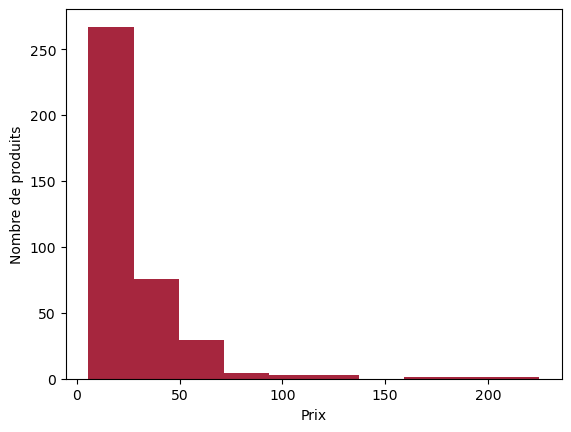

Moyenne : 26.58 €
Médiane : 19 €
Skewness : 3.72
Kurtosis : 20.19


In [81]:
color = ["#A6263E"]
x = ca_prod_bottleneck["price"]
plot.hist(x, color=color)

plot.xlabel("Prix")
plot.ylabel("Nombre de produits")

plot.show()

print("Moyenne :", round(ca_prod_bottleneck["price"].mean(), 2),"€")
print("Médiane :", round(ca_prod_bottleneck["price"].median()), "€")
print("Skewness :", round(ca_prod_bottleneck["price"].skew(), 2))
print("Kurtosis :", round(ca_prod_bottleneck["price"].kurtosis(), 2))

### Mesures de dispersion<a class="anchor" id="sub_partie4-1-4"></a>

Les mesures de dispersion viennent préciser la façon dont les prix se répartissent. Ici, on peut observer que les données sont très dispersés et qu'il semblerait avoir des outliers.

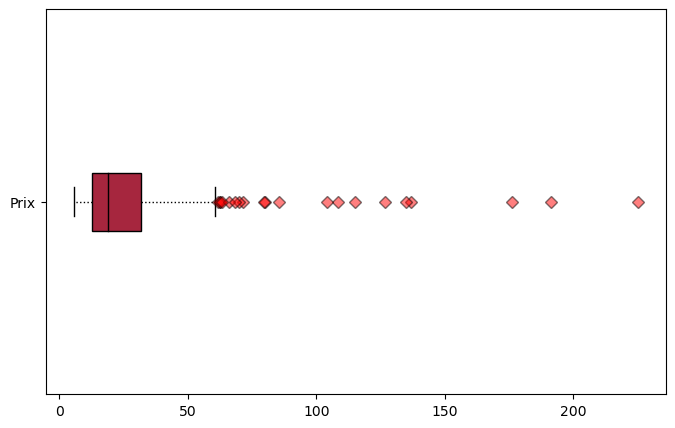

Variance : 620.12
Ecart-type : 24.9 €
Coefficient de variation : 0.94


In [82]:
data = ca_prod_bottleneck["price"]

fig = plot.figure(figsize=(8, 5))
ax = fig.subplots()
bp = ax.boxplot(data, patch_artist = True, vert = False)

color = ["#A6263E"]
for patch, color in zip(bp['boxes'], color): patch.set_facecolor(color)
    
for whisker in bp["whiskers"]: whisker.set(linewidth = 1, linestyle =":")
for median in bp["medians"]: median.set(color ="black", linewidth = 1)
for cap in bp["caps"]: cap.set(linewidth = 1)
for flier in bp["fliers"]: flier.set(marker ="D", markerfacecolor="red", alpha = 0.5)
    
ax.set_yticklabels(["Prix"])

plot.show()

print("Variance :", round(ca_prod_bottleneck["price"].var(ddof=0), 2))
print("Ecart-type :", round(ca_prod_bottleneck["price"].std(ddof=0), 2), "€")
print("Coefficient de variation :", round(ca_prod_bottleneck["price"].std() / ca_prod_bottleneck["price"].mean(), 2))

## Analyse des outliers<a class="anchor" id="sub_partie4-1-5"></a>

### Ecart interquartile

Toutes les observations qui se situent à plus de 1,5 fois l'IQR en dessous de Q1 ou à plus de 1,5 fois l'IQR au-dessus de Q3 sont considérées comme des valeurs aberrantes.

In [83]:
q1 = np.quantile(ca_prod_bottleneck["price"], 0.25)

q3 = np.quantile(ca_prod_bottleneck["price"], 0.75)

med = np.median(ca_prod_bottleneck["price"])

iqr = q3-q1
print("L'écart interquartile est le suivant:", round(iqr, 2), "\n")

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = ca_prod_bottleneck["price"][(ca_prod_bottleneck["price"] <= lower_bound) | (ca_prod_bottleneck["price"] >= upper_bound)]
print("Les valeurs aberrantes sont les suivantes :\n{}".format(outliers))

L'écart interquartile est le suivant: 19.2 

Les valeurs aberrantes sont les suivantes :
5       80.0
12      71.6
126     69.8
135    225.0
136     79.5
137    126.5
139     85.6
142     62.5
143    176.0
144    108.5
145    104.0
149     61.6
165     62.4
236    137.0
293     65.9
299     63.4
339    191.3
359    135.0
365    115.0
371     68.3
Name: price, dtype: float64


A priori, nous avons donc des valeurs atypiques que nous pouvons lier à des bouteilles très luxueuses (champagne, cognac, millésimé, etc). Ces prix ne semblent donc pas être des erreurs.

In [84]:
outliers_prix = ca_prod_bottleneck.iloc[[5, 12, 126, 135, 136, 137, 139, 142, 143, 144, 145, 149, 165, 236, 293, 299, 339, 359, 365, 371]].sort_values("price", ascending=False)
display(outliers_prix.reset_index(drop=True))

,product_id,sku,post_title,stock_status,price,total_sales,sales_revenue
0,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,outofstock,225.0,5,1125.0
1,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,instock,191.3,3,573.9
2,4402,3510,Cognac Frapin VIP XO,instock,176.0,13,2288.0
3,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,instock,137.0,5,685.0
4,6126,14923,Champagne Gosset Célébris Vintage 2007,instock,135.0,2,270.0
5,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,instock,126.5,11,1391.5
6,6212,13996,Domaine des Comtes Lafon Volnay 1er Cru Santen...,instock,115.0,2,230.0
7,4404,3507,Cognac Frapin Château de Fontpinot XO,instock,108.5,2,217.0
8,4407,3509,Cognac Frapin Cigar Blend,instock,104.0,1,104.0
9,4359,13853,Champagne Larmandier-Bernier Grand Cru Les Che...,outofstock,85.6,1,85.6


### Z-Score

Ajoutons une colonne pour calculer le zscore du prix de chaque bouteille. Celui-ci va nous permettrent de mieux distinguer les valeurs atypiques.

In [85]:
ca_prod_bottleneck["zscore"] = (ca_prod_bottleneck["price"] - ca_prod_bottleneck["price"].mean())/ca_prod_bottleneck["price"].std()

Nous pouvons supposer que si un zscore est supérieur à 3, la valeur est inhabituelle. Ici, on peut remarquer que ce sont les bouteilles les plus chers qui ont des zscores élevés. Ici, on retrouve les mêmes bouteilles qu'avec la méthode de l'écart interquartile.

In [86]:
ca_prod_bottleneck.sort_values("zscore", ascending=False).reset_index(drop=True)[0:10]

,product_id,sku,post_title,stock_status,price,total_sales,sales_revenue,zscore
0,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,outofstock,225.0,5,1125.0,7.957582
1,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,instock,191.3,3,573.9,6.606043
2,4402,3510,Cognac Frapin VIP XO,instock,176.0,13,2288.0,5.992436
3,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,instock,137.0,5,685.0,4.428340
4,6126,14923,Champagne Gosset Célébris Vintage 2007,instock,135.0,2,270.0,4.348130
5,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,instock,126.5,11,1391.5,4.007237
6,6212,13996,Domaine des Comtes Lafon Volnay 1er Cru Santen...,instock,115.0,2,230.0,3.546029
7,4404,3507,Cognac Frapin Château de Fontpinot XO,instock,108.5,2,217.0,3.285347
8,4407,3509,Cognac Frapin Cigar Blend,instock,104.0,1,104.0,3.104874
9,4359,13853,Champagne Larmandier-Bernier Grand Cru Les Che...,outofstock,85.6,1,85.6,2.366941


Pour souligner notre hypothèse, faisons le choix de créer un sous-échantillon qui permet de visualiser des tranches de prix. Ici, on retrouve des moyennes et des médianes qui ont plus de sens et il n'existe plus que quelques valeurs aberrantes.

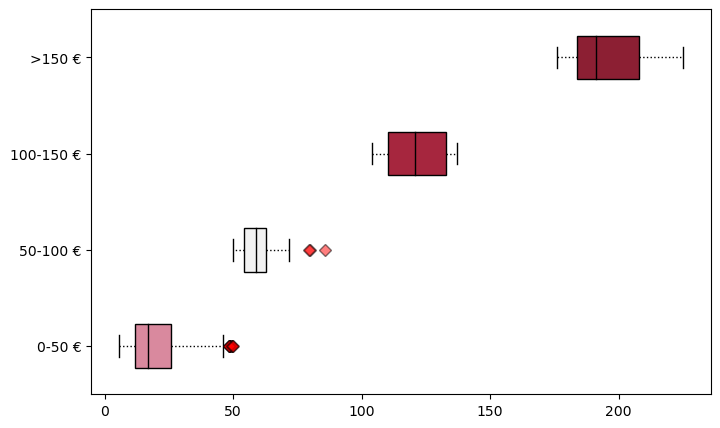

Catégorie [0-50 €] n = 344 - Moyenne : 20.28 € | Mediane : 16.9 €
Catégorie [50-100 €] n = 32 - Moyenne : 60.56 € | Mediane : 59.0 €
Catégorie [100-150 €] n = 6 - Moyenne : 121.0 € | Mediane : 120.75 €
Catégorie [>150 €] n = 3 - Moyenne: 197.43 € | Mediane : 191.3 €


In [87]:
values = ca_prod_bottleneck["price"]
value_a = values[(values >= 0) & (values < 50)]
value_b = values[(values >= 50) & (values < 100)]
value_c = values[(values >= 100) & (values < 150)]
value_d = values[(values >= 150)]

data = [value_a, value_b, value_c, value_d]

fig = plot.figure(figsize=(8, 5))
ax = fig.subplots()

bp = ax.boxplot(data, patch_artist = True, vert = False)

colors = ["#D9899E", '#F2F2F2','#A6263E', '#8C1F33']
for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color)

for whisker in bp["whiskers"]: whisker.set(linewidth = 1, linestyle =":")
for median in bp["medians"]: median.set(color ="black", linewidth = 1)
for cap in bp["caps"]: cap.set(linewidth = 1)
for flier in bp["fliers"]: flier.set(marker ="D", markerfacecolor="red", alpha = 0.5)

ax.set_yticklabels(["0-50 €", "50-100 €", "100-150 €", ">150 €"])

plot.show()

print("Catégorie [0-50 €] n =",value_a.value_counts().sum(), "- Moyenne :", round(value_a.mean(), 2), "€ | Mediane :", value_a.median(), "€")
print("Catégorie [50-100 €] n =",value_b.value_counts().sum(), "- Moyenne :", round(value_b.mean(), 2), "€ | Mediane :", value_b.median(), "€")
print("Catégorie [100-150 €] n =",value_c.value_counts().sum(), "- Moyenne :", round(value_c.mean(), 2), "€ | Mediane :", value_c.median(), "€")
print("Catégorie [>150 €] n =",value_d.value_counts().sum(), "- Moyenne:", round(value_d.mean(), 2), "€ | Mediane :", value_d.median(), "€")

Nous récupérons les informations produit liés aux valeurs qui semblent "distante" des catégorie [0-50 €] et catégorie [50-100 €].

#### Catégorie [0-50 €] 

In [88]:
q1_a = np.quantile(value_a, 0.25)

q3_a = np.quantile(value_a, 0.75)

med = np.median(value_a)

iqr_a = q3_a-q1_a
print("L'écart interquartile est le suivant:", round(iqr_a, 2), "\n")

upper_bound = q3_a+(1.5*iqr_a)
lower_bound = q1_a-(1.5*iqr_a)

outliers_a = value_a[(value_a <= lower_bound) | (value_a >= upper_bound)]
print("Les valeurs aberrantes sont les suivantes :\n{}".format(outliers_a))

L'écart interquartile est le suivant: 14.15 

Les valeurs aberrantes sont les suivantes :
46     49.0
90     48.5
133    49.0
140    49.5
154    49.0
285    49.5
290    48.4
345    48.5
346    49.5
382    49.9
Name: price, dtype: float64


In [89]:
ca_prod_bottleneck.iloc[[46, 90, 133, 140, 154, 284, 289, 344, 345, 381]].sort_values("price", ascending=False)

,product_id,sku,post_title,stock_status,price,total_sales,sales_revenue,zscore
140,4364,11585,Wemyss Malts Blended Malt Scotch Whisky The Hive,instock,49.5,1,49.5,0.919150
46,4144,1662,Champagne Gosset Grand Rosé,instock,49.0,87,4263.0,0.899097
133,4334,7818,Champagne Gosset Grand Blanc de Blancs,outofstock,49.0,96,4704.0,0.899097
154,4604,15660,Catherine et Claude Maréchal Pommard La Chaniè...,instock,49.0,1,49.0,0.899097
90,4211,15714,Lucien Boillot Pommard 2017,outofstock,48.5,1,48.5,0.879045
345,5922,15343,Albert Mann Pinot Noir Clos de la Faille 2017,outofstock,48.5,17,824.5,0.879045
289,5520,15863,Domaine Chambeyron Côte Rôtie La Chavarine 2017,instock,38.6,2,77.2,0.482005
344,5914,14265,Darnley's London Dry Gin Spiced,instock,36.0,1,36.0,0.377732
284,5485,16131,Decelle-Villa Savigny-Lès-Beaune Blanc 2018,instock,33.4,3,100.2,0.273459
381,6738,8193,Emile Boeckel Crémant Chardonnay Extra Brut 2016,instock,15.4,3,46.2,-0.448432


#### Catégorie [50-100 €]

In [90]:
q1_b = np.quantile(value_b, 0.25)

q3_b = np.quantile(value_b, 0.75)

med = np.median(value_b)

iqr_b = q3_b-q1_b
print("L'écart interquartile est le suivant:", round(iqr_b, 2), "\n")

upper_bound = q3_b+(1.5*iqr_b)
lower_bound = q1_b-(1.5*iqr_b)

outliers_b = value_b[(value_b <= lower_bound) | (value_b >= upper_bound)]
print("Les valeurs aberrantes sont les suivantes :\n{}".format(outliers_b))

L'écart interquartile est le suivant: 8.33 

Les valeurs aberrantes sont les suivantes :
5      80.0
136    79.5
139    85.6
Name: price, dtype: float64


In [91]:
ca_prod_bottleneck.iloc[[5, 136, 139]].sort_values("price", ascending=False)

,product_id,sku,post_title,stock_status,price,total_sales,sales_revenue,zscore
139,4359,13853,Champagne Larmandier-Bernier Grand Cru Les Che...,outofstock,85.6,1,85.6,2.366941
5,4046,15269,Pierre Gaillard Côte Rôtie Rose Pourpre 2017,outofstock,80.0,6,480.0,2.142353
136,4353,12587,Champagne Egly-Ouriet Grand Cru Brut Rosé,instock,79.5,3,238.5,2.122301


Il ne semble pas y avoir d'erreur de prix lorsque nous isolons les produits de ces deux catégories.

## Analyse univariée de la variable "Chiffre d'affaires"<a class="anchor" id="sous_partie4-2"></a>

Ici, on peut voir que la variable "chiffre d'affaires" est similaire à la variable "prix". Les valeurs sont très concentrés et la moyenne est difficile à intépréter.

### Mesures de tendance centrale & de dispersion<a class="anchor" id="sub_partie4-2-1"></a>

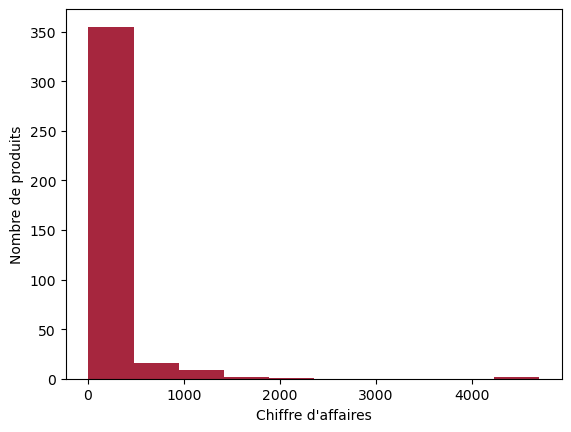

Moyenne : 183.3 €
Médiane : 81.6 €
Skewness : 7.47
Kurtosis : 72.1


In [92]:
color = ["#A6263E"]
x = ca_prod_bottleneck["sales_revenue"]
plot.hist(x, color=color)

plot.xlabel("Chiffre d'affaires")
plot.ylabel("Nombre de produits")

plot.show()

print("Moyenne :", round(ca_prod_bottleneck["sales_revenue"].mean(), 2),"€")
print("Médiane :", round(ca_prod_bottleneck["sales_revenue"].median(), 2), "€")
print("Skewness :", round(ca_prod_bottleneck["sales_revenue"].skew(), 2))
print("Kurtosis :", round(ca_prod_bottleneck["sales_revenue"].kurtosis(), 2))

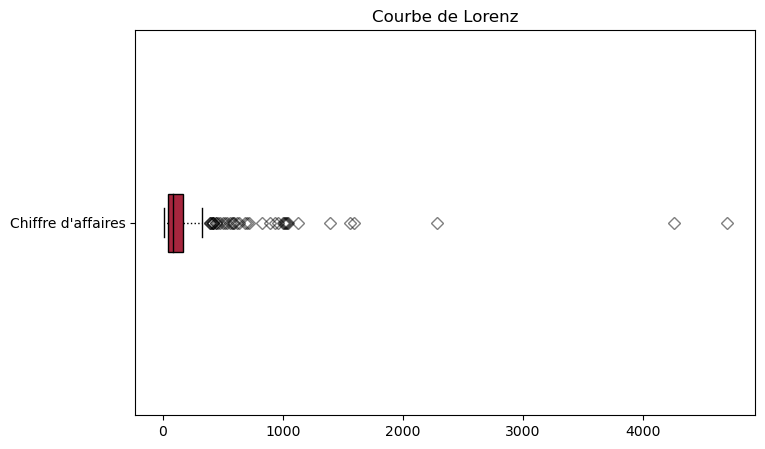

Variance : 159843.11
Ecart-type : 399.8 €
Coefficient de variation : 2.18


In [93]:
data = ca_prod_bottleneck["sales_revenue"]

fig = plot.figure(figsize=(8, 5))
ax = fig.subplots()
bp = ax.boxplot(data, patch_artist = True, vert = False)

color = ["#A6263E"]
for patch, color in zip(bp['boxes'], color): patch.set_facecolor(color)
    
for whisker in bp["whiskers"]: whisker.set(linewidth = 1, linestyle =":")
for median in bp["medians"]: median.set(color ="black", linewidth = 1)
for cap in bp["caps"]: cap.set(linewidth = 1)
for flier in bp["fliers"]: flier.set(marker ="D", alpha = 0.5)
    
ax.set_yticklabels(["Chiffre d'affaires"])
plot.title("Courbe de Lorenz")

plot.show()

print("Variance :", round(ca_prod_bottleneck["sales_revenue"].var(ddof=0), 2))
print("Ecart-type :", round(ca_prod_bottleneck["sales_revenue"].std(ddof=0), 2), "€")
print("Coefficient de variation :", round(ca_prod_bottleneck["sales_revenue"].std() / ca_prod_bottleneck["sales_revenue"].mean(), 2))

### Mesures de concentration<a class="anchor" id="sub_partie4-2-2"></a>

Il semblerait que 80 % du chiffre d’affaires est fait par 30 % des produits. 

#### Courbe de Lorenz

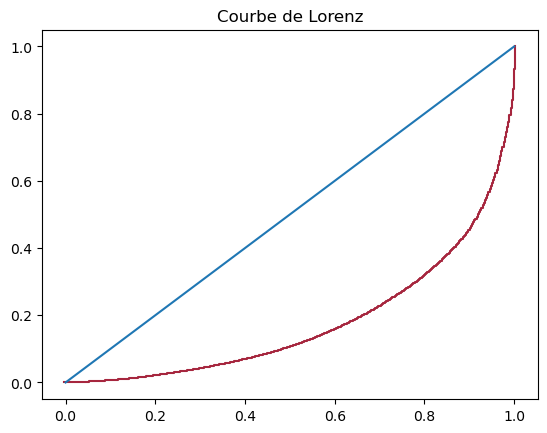

In [94]:
prix = ca_prod_bottleneck["sales_revenue"].values
n = len(prix)
lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0], lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
plot.plot(xaxis, lorenz, drawstyle='steps-post', color='#A6263E')
plot.plot([0,1], [0,1]) 

plot.title("Courbe de Lorenz")
plot.show()

#### Indice de GINI

Cette indice permet d’évaluer de façon chiffrée cette répartition. On peut constater que le degré d'inégalité est prononcé. 

In [95]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC 
gini = 2*S
gini

0.6384416143878568

Globalement, cela indique que les bouteilles qui ont un prix "atypique" influence grandement le [chiffre d'affaires](#partie3)

# Analyse bivariée des variables "Nombre de ventes" et "Prix"<a class="anchor" id="partie5"></a>

Le nombre de ventes est-il corrélée au prix ?

### Diagramme de dispersion<a class="anchor" id="sous_partie5-1"></a>

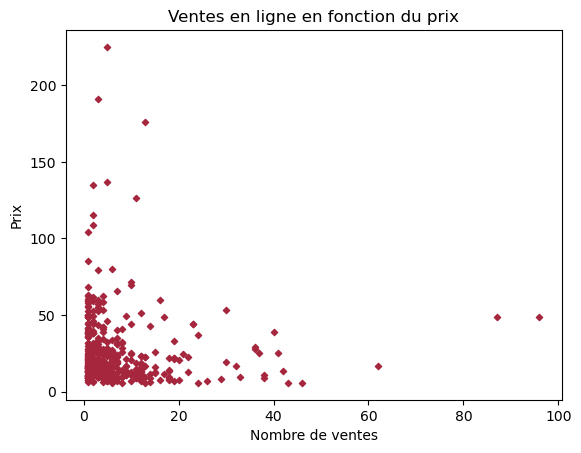

In [96]:
x = ca_prod_bottleneck["total_sales"]
y = ca_prod_bottleneck["price"]

plot.scatter(x, y, c="#A6263E", marker="D", s=10)

plot.title("Ventes en ligne en fonction du prix")
plot.ylabel("Prix")
plot.xlabel("Nombre de ventes")
plot.show()

### Coefficient de Pearson<a class="anchor" id="sous_partie5-2"></a>

Ici, les deux variables ont une forte corrélation négative (inverse), car 𝑟 est négatif, mais plus proche de 0 que de −1.

In [97]:
print(st.pearsonr(ca_prod_bottleneck["price"], ca_prod_bottleneck["total_sales"])[0])

-0.055855146497072905


Mais si on enlève les valeurs atypiques soit tous les prix possédant un zscore inférieur à -2 et supérieur à 2, on peut constater que la corrélation est présente.

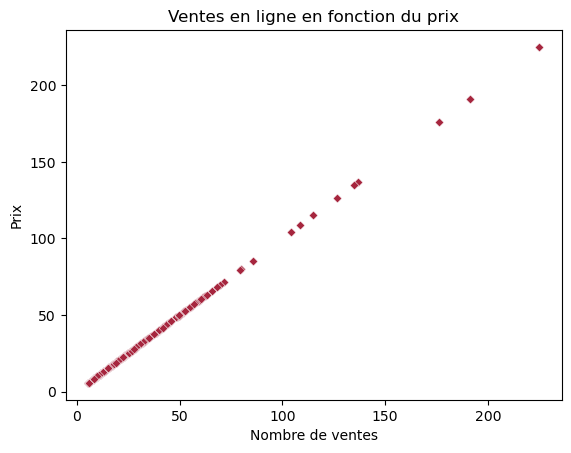

In [98]:
x = ca_prod_bottleneck["total_sales"]
y = ca_prod_bottleneck["price"]

sb.scatterplot(data = ca_prod_bottleneck.loc[(ca_prod_bottleneck["zscore"] > -2) & (ca_prod_bottleneck["zscore"] < 2)], x = y, y = y, color="#A6263E", marker="D", s=20)

plot.title("Ventes en ligne en fonction du prix")
plot.ylabel("Prix")
plot.xlabel("Nombre de ventes")
plot.show()

Ici, les deux variables ont une forte corrélation positive (directe), car 𝑟 se rapproche de 1. 

In [99]:
print(st.pearsonr((ca_prod_bottleneck["zscore"] > -2) & (ca_prod_bottleneck["zscore"] < 2), ca_prod_bottleneck["total_sales"])[0])

0.05056853567634031


On peut donc conclure que le prix a une influence sur le nombre de ventes. Si on retire les bouteilles considérés "très luxueuse", plus la bouteille sera cher, moins elle générera de ventes. 